# PLACEMENT PROJECT 
### IMPLEMENTING STEPS 
0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values  ==> Set range of every input
3. Train test split  ==> Cross Validation 
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.dtypes

Unnamed: 0      int64
cgpa          float64
iq            float64
placement       int64
dtype: object

In [6]:
df.shape

(100, 4)

Preprocessing >> Only remove the 1st column which is Unnessessery  

In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


EDA

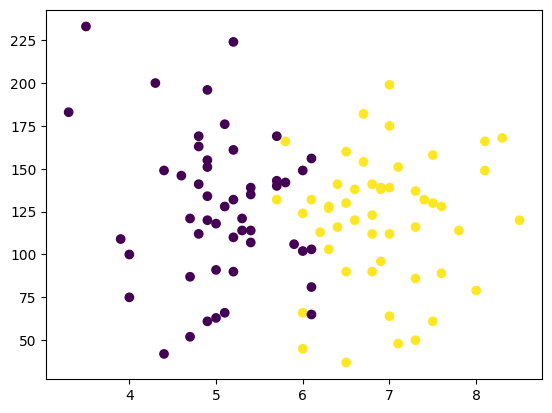

In [9]:
plt.scatter(df["cgpa"],df["iq"] , c = df["placement"] )

# LOGISTIC REGRESSION MODEL
 It Classify the data   <br> <br> 
<img src="Logistic Regression.png" alt="Logistic Regression">
<br> 
<br> 
cgpa & iq is independent variables 
placement is the dependent variable 

In [10]:
 x = df.iloc[:,0:2]
 y =  df.iloc[:,-1]

In [11]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [13]:
#  2D tensor 
x.shape

(100, 2)

In [14]:
#  1D tensor 
y.shape

(100,)

Train Test split 

In [15]:
from sklearn.model_selection import train_test_split

In [37]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.1) 
# 10 % testing data
# 90 %  Training data

In [38]:
x_train

,cgpa,iq
49,5.4,135.0
22,4.9,120.0
66,6.9,96.0
78,6.1,81.0
98,6.3,103.0
...,...,...
35,6.8,90.0
13,6.4,116.0
53,8.3,168.0
70,6.3,127.0


In [39]:
y_train

49    0
22    0
66    1
78    0
98    1
     ..
35    1
13    1
53    1
70    1
52    1
Name: placement, Length: 90, dtype: int64

In [40]:
x_test

,cgpa,iq
19,5.2,132.0
36,5.7,140.0
21,7.1,151.0
11,6.9,138.0
45,6.0,66.0
42,7.6,89.0
93,6.8,112.0
38,6.5,160.0
96,4.4,42.0
59,4.8,112.0


In [41]:
y_test

19    0
36    0
21    1
11    1
45    1
42    1
93    1
38    1
96    0
59    0
Name: placement, dtype: int64

scale the value  (from -1 to 1)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scalar = StandardScaler()

In [44]:
x_train = scalar.fit_transform(x_train)

In [45]:
x_train

array([[-0.50290676,  0.25962556],
       [-0.93727921, -0.11563623],
       [ 0.80021057, -0.71605509],
       [ 0.10521466, -1.09131688],
       [ 0.27896364, -0.54093292],
       [ 0.88708506,  1.86074254],
       [ 1.58208097, -0.26574094],
       [ 0.88708506, -0.31577585],
       [-0.67665574, -0.36581075],
       [-1.11102819, -0.94121216],
       [-0.06853432, -0.46588056],
       [-2.32727103,  1.46046329],
       [ 0.01834017, -1.99194518],
       [ 1.14770853, -0.96622962],
       [-0.15540881,  1.0351666 ],
       [-0.93727921, -1.59166593],
       [ 0.97395955, -1.91689282],
       [ 1.23458302,  0.18457321],
       [-0.2422833 ,  0.18457321],
       [-0.2422833 ,  1.11021896],
       [ 1.84270444,  1.0351666 ],
       [-0.50290676,  0.35969538],
       [-0.85040472, -0.84114235],
       [ 0.36583813,  0.40973028],
       [ 0.71333608,  0.40973028],
       [ 0.71333608, -0.04058387],
       [ 0.01834017, -0.56595037],
       [ 1.32145751, -1.59166593],
       [ 0.45271262,

In [46]:
x_test = scalar.transform(x_test)

In [47]:
x_test

array([[-0.67665574,  0.18457321],
       [-0.2422833 ,  0.38471283],
       [ 0.97395955,  0.65990481],
       [ 0.80021057,  0.33467792],
       [ 0.01834017, -1.46657867],
       [ 1.40833199, -0.89117726],
       [ 0.71333608, -0.31577585],
       [ 0.45271262,  0.88506188],
       [-1.37165165, -2.06699753],
       [-1.0241537 , -0.31577585]])

Train the model 

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model = LogisticRegression()

In [50]:
# training the model 
model.fit(x_train,y_train)

LogisticRegression()

Evaluate the model
<p>find the accuracy </p>

In [51]:
# this will predict the placement for the x_test data 
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0])

In [52]:
# actuall result of the placement 
y_test

19    0
36    0
21    1
11    1
45    1
42    1
93    1
38    1
96    0
59    0
Name: placement, dtype: int64

In [53]:
#  now check the accuracy (by comparing y_pred and y_test)

In [54]:
from sklearn.metrics import accuracy_score 

In [55]:
accuracy_score(y_test,y_pred)

0.9

The decision boundry(that Logistic reg model create after understanding the hidden pattern in data)

In [56]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

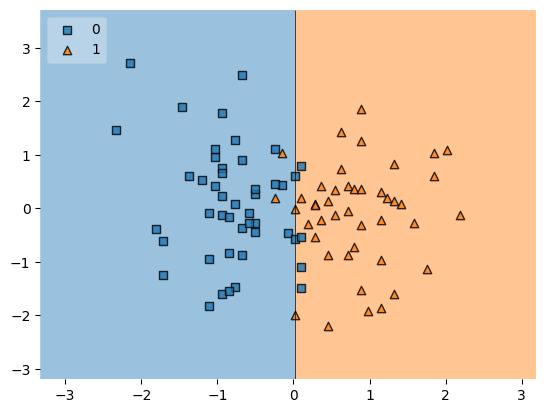

In [57]:
plot_decision_regions(x_train, y_train.values, clf=model, legend=2)

In [59]:
# obj to file 

In [60]:
import pickle

In [61]:
pickle.dump(model,open('model.pkl','wb'))